In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
df=pd.read_csv('heart_disease.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [4]:
df[['age','chol','trestbps','thalch','oldpeak','num']].cov()

,age,chol,trestbps,thalch,oldpeak,num
age,83.869526,-102.625594,47.456876,-80.539270,2.415324,3.421902
chol,-102.625594,12565.950148,268.691873,594.666922,3.651631,-30.637130
trestbps,47.456876,268.691873,416.225611,-72.929665,3.518135,3.204581
thalch,-80.539270,594.666922,-72.929665,718.504217,-3.910483,-9.910316
oldpeak,2.415324,3.651631,3.518135,-3.910483,1.196562,0.540297
num,3.421902,-30.637130,3.204581,-9.910316,0.540297,1.309735


In [5]:
df[['age','chol','trestbps','thalch','oldpeak','num']].corr()

,age,chol,trestbps,thalch,oldpeak,num
age,1.000000,-0.099967,0.253999,-0.328088,0.242662,0.326493
chol,-0.099967,1.000000,0.117488,0.197907,0.029898,-0.238813
trestbps,0.253999,0.117488,1.000000,-0.133360,0.167131,0.137251
thalch,-0.328088,0.197907,-0.133360,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.029898,0.167131,-0.139598,1.000000,0.437577
num,0.326493,-0.238813,0.137251,-0.323058,0.437577,1.000000


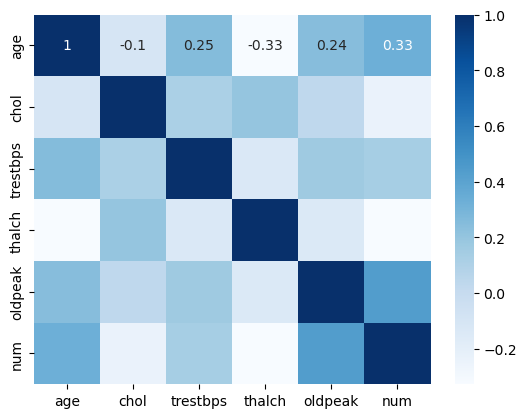

In [6]:
sns.heatmap(df[['age','chol','trestbps','thalch','oldpeak','num']].corr(),annot=True,cmap='Blues')
plt.show()

<Figure size 2000x2000 with 0 Axes>

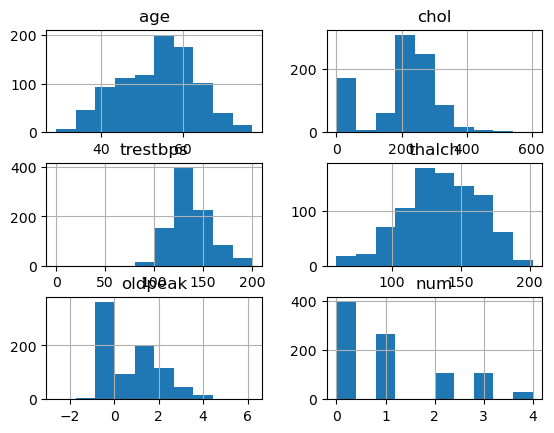

In [7]:
plt.figure(figsize=(20,20))
df.hist(['age','chol','trestbps','thalch','oldpeak','num'])
plt.show()

In [8]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [9]:
df['oldpeak'].mode()

0    0.0
Name: oldpeak, dtype: float64

In [10]:
df['oldpeak']=df['oldpeak'].fillna(0.0)

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [12]:
Target=df['cp']

In [13]:
Features=df.drop('cp',axis=1)

In [14]:
Target

0       typical angina
1      atypical angina
2         asymptomatic
3       typical angina
4         asymptomatic
            ...       
903       asymptomatic
904       asymptomatic
905        non-anginal
906        non-anginal
907       asymptomatic
Name: cp, Length: 908, dtype: object

In [15]:
Features

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,144,208,True,st-t abnormality,105,TURE,0.0,downsloping,normal,4


In [16]:
Features=pd.get_dummies(Features,dtype='float')

In [17]:
Features

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,restecg_lv hypertrophy,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,41,135,203,False,132,0.0,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,57,140,192,False,148,0.4,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,52,118,186,False,190,0.0,0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,57,110,201,False,126,1.5,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
904,62,166,170,False,120,3.0,4,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
905,56,170,0,False,123,2.5,4,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
906,56,144,208,True,105,0.0,4,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
OHE=OneHotEncoder()

In [19]:
Features['fbs']=OHE.fit_transform(Features[['fbs']]).toarray()

In [20]:
Features

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,restecg_lv hypertrophy,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,0.0,150,2.3,0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,41,135,203,1.0,132,0.0,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,57,140,192,1.0,148,0.4,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,52,118,186,1.0,190,0.0,0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,57,110,201,1.0,126,1.5,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,1.0,120,1.5,4,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
904,62,166,170,1.0,120,3.0,4,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
905,56,170,0,1.0,123,2.5,4,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
906,56,144,208,0.0,105,0.0,4,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
x_train,x_test,y_train,y_test=train_test_split(Features,Target,train_size=0.75,random_state=50)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(681, 21)
(227, 21)
(681,)
(227,)


In [23]:
dec_tree= DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5)

In [24]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')

In [25]:
y_pred=dec_tree.predict(x_test)

In [26]:
y_pred

array(['asymptomatic', 'asymptomatic', 'atypical angina', 'asymptomatic',
       'typical angina', 'atypical angina', 'non-anginal',
       'atypical angina', 'non-anginal', 'asymptomatic', 'asymptomatic',
       'atypical angina', 'atypical angina', 'asymptomatic',
       'asymptomatic', 'atypical angina', 'asymptomatic', 'asymptomatic',
       'atypical angina', 'non-anginal', 'non-anginal', 'asymptomatic',
       'asymptomatic', 'non-anginal', 'asymptomatic', 'atypical angina',
       'asymptomatic', 'non-anginal', 'atypical angina', 'asymptomatic',
       'asymptomatic', 'atypical angina', 'asymptomatic',
       'atypical angina', 'asymptomatic', 'asymptomatic', 'asymptomatic',
       'asymptomatic', 'asymptomatic', 'asymptomatic', 'asymptomatic',
       'asymptomatic', 'asymptomatic', 'atypical angina',
       'atypical angina', 'atypical angina', 'atypical angina',
       'non-anginal', 'asymptomatic', 'atypical angina', 'asymptomatic',
       'asymptomatic', 'asymptomatic', 'aty

In [27]:
accuracy_score(y_test,y_pred)

0.5903083700440529

In [28]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [50]:
grid_search= GridSearchCV(dec_tree,params,verbose=2)

In [51]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, 

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             verbose=2)

In [52]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}

In [53]:
dec_tree= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=2)

In [54]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [55]:
y_pred_new=dec_tree.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred_new)

0.5814977973568282

In [57]:
classification_report(y_test,y_pred_new)

C:\Users\Varun Sayam\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Varun Sayam\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Varun Sayam\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'                 precision    recall  f1-score   support\n\n   asymptomatic       0.70      0.84      0.76       122\natypical angina       0.37      0.67      0.47        45\n    non-anginal       0.00      0.00      0.00        48\n typical angina       0.00      0.00      0.00        12\n\n       accuracy                           0.58       227\n      macro avg       0.27      0.38      0.31       227\n   weighted avg       0.45      0.58      0.50       227\n'

In [37]:
dec_tree_prob=dec_tree.predict_log_proba(x_test)[:,1]

In [38]:
dec_tree_prob

array([-3.73766962, -3.73766962, -0.91228271, -3.17805383, -1.9095425 ,
       -0.91228271, -3.17805383, -0.91228271, -0.91228271, -3.73766962,
       -3.17805383, -0.91228271, -0.91228271, -3.73766962, -3.73766962,
       -0.91228271, -3.17805383, -3.73766962, -0.91228271, -0.91228271,
       -3.17805383, -3.73766962, -3.17805383, -0.91228271, -3.17805383,
       -0.91228271, -3.73766962, -1.9095425 , -0.91228271, -1.9095425 ,
       -3.17805383, -0.91228271, -3.17805383, -0.91228271, -3.17805383,
       -3.17805383, -3.73766962, -1.9095425 , -3.17805383, -3.17805383,
       -3.17805383, -3.73766962, -3.73766962, -0.91228271, -0.91228271,
       -0.91228271, -0.91228271, -0.91228271, -3.73766962, -0.91228271,
       -3.17805383, -3.73766962, -3.17805383, -0.91228271, -0.91228271,
       -0.91228271, -3.73766962, -3.73766962, -3.73766962, -3.73766962,
       -3.73766962, -3.73766962, -0.91228271, -0.91228271, -3.17805383,
       -0.91228271, -3.17805383, -3.17805383, -1.9095425 , -3.73

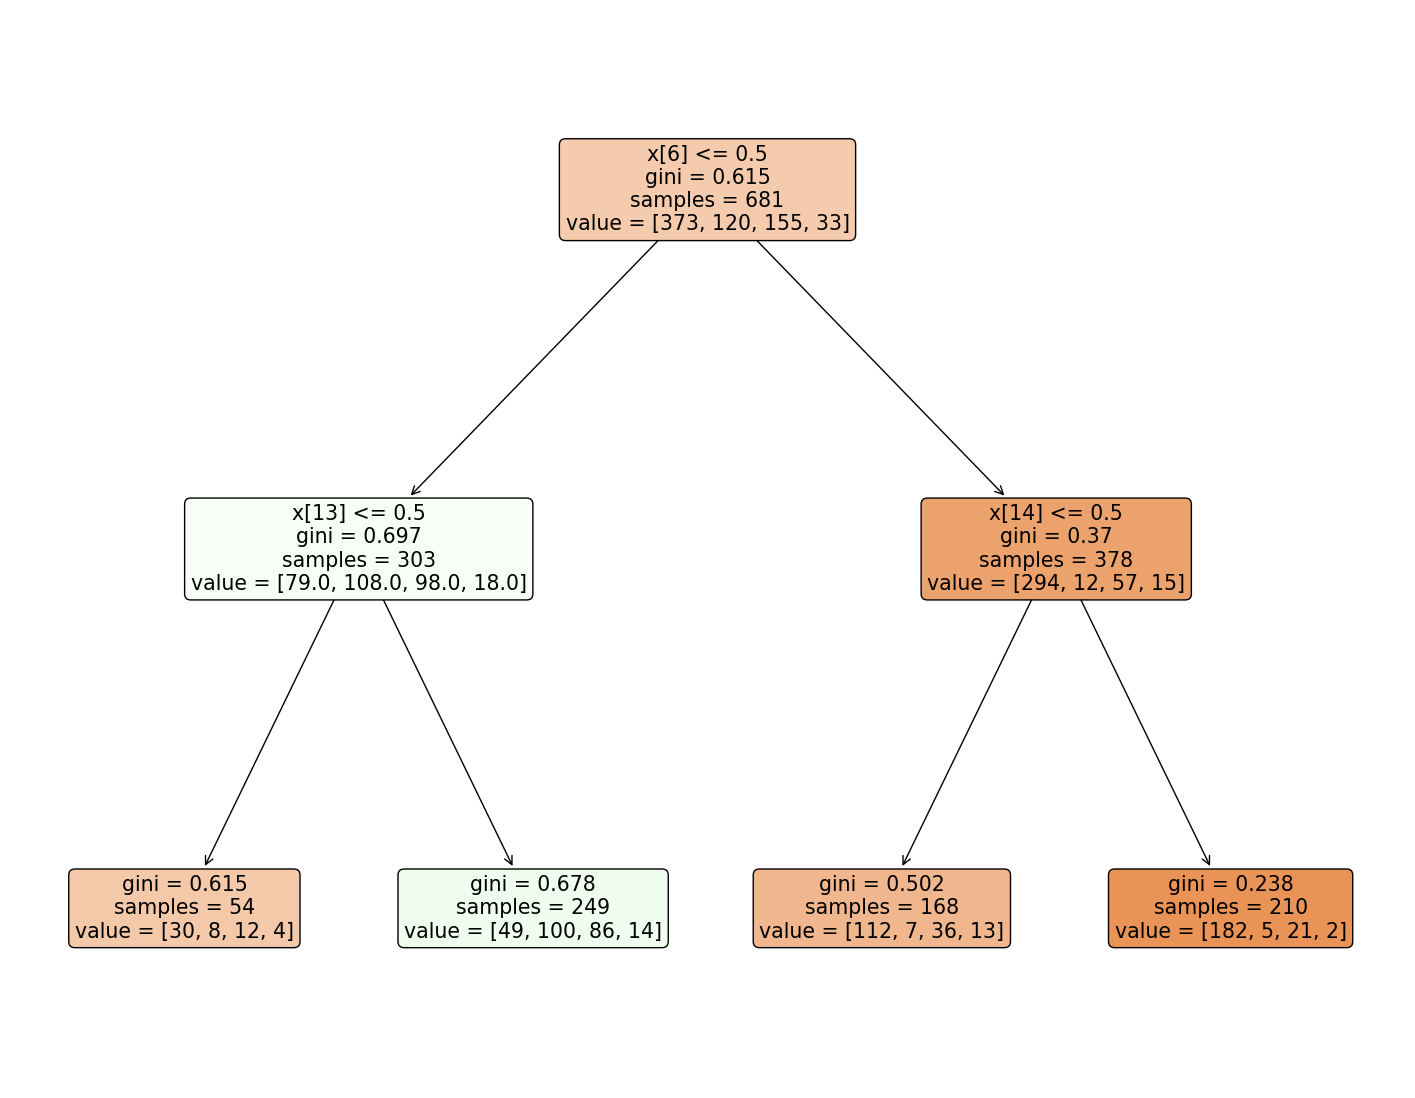

In [60]:
plt.figure(figsize=(18,14))
plot_tree(dec_tree,filled=True,rounded=True);

In [40]:
cm = confusion_matrix(y_test, y_pred_new)

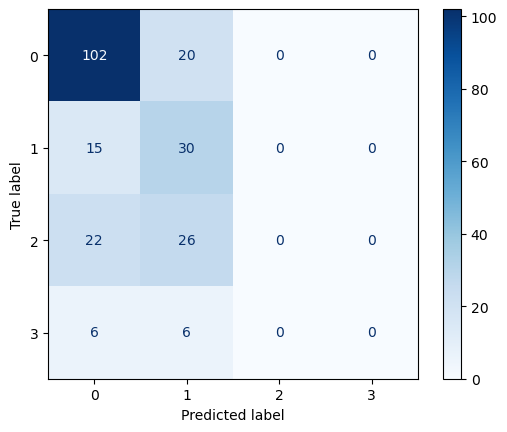

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [42]:
def plot_feature_importance(model,feature_names ):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(20, 16))
    plt.title("Feature Importance")
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(feature_names)])
    plt.show()

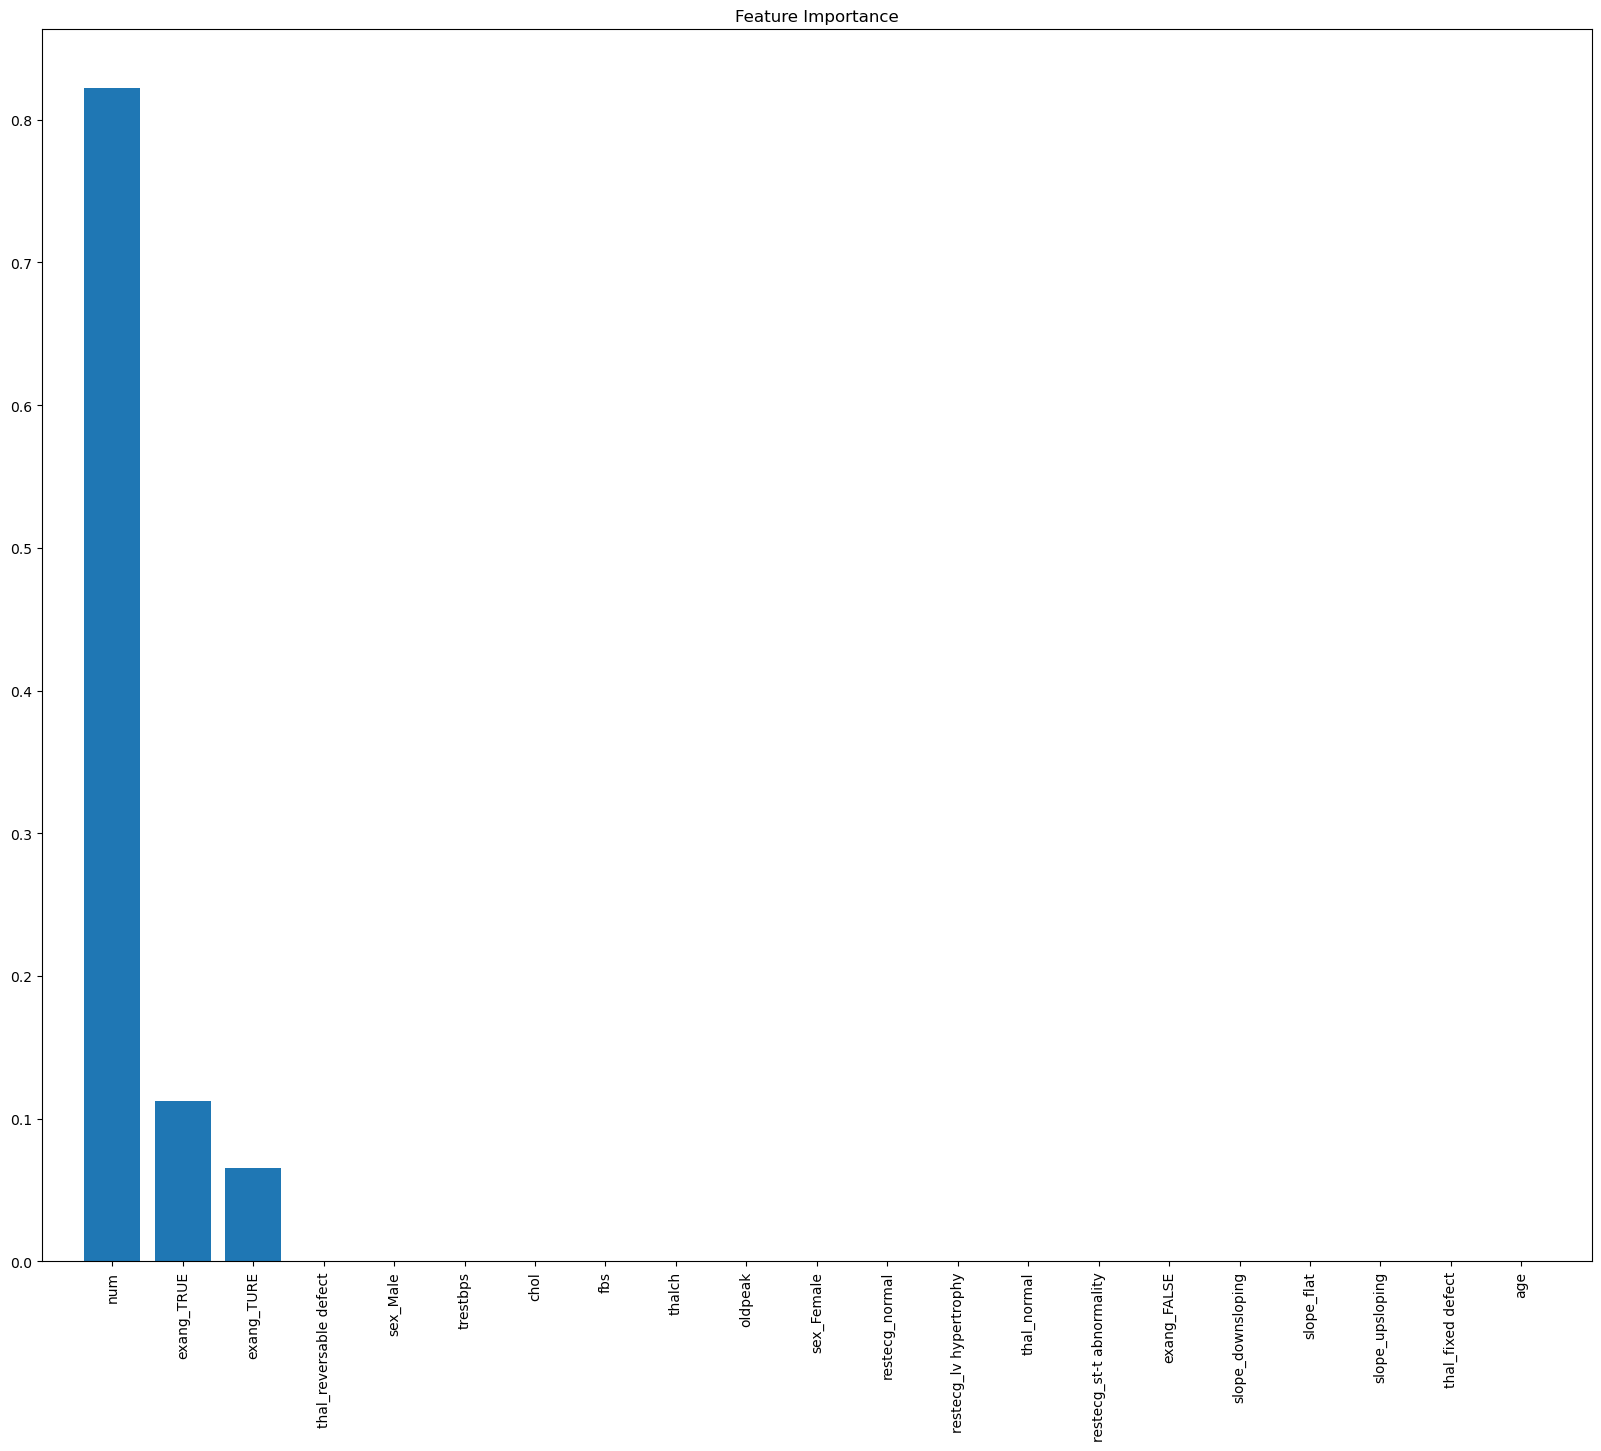

In [43]:
plot_feature_importance(dec_tree,x_train.columns.to_list())

In [44]:
y_test.unique

<bound method Series.unique of 863        non-anginal
814       asymptomatic
284        non-anginal
639        non-anginal
202        non-anginal
            ...       
160     typical angina
550       asymptomatic
854     typical angina
264    atypical angina
565       asymptomatic
Name: cp, Length: 227, dtype: object>